# Pneumonia Detection Project
The data set for this project is split into two:
* `image_data` - two-dimensional images stored as a numpy array
*  `metadata` - image classifications (1 for pneumonia, 0 otherwise) and images' locations (indices) in the dataset

In [ ]:
#@title Load your dataset { display-mode: "form" }
import numpy as np
import pandas as pd

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20A)%20Pneumonia/metadata.csv"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20A)%20Pneumonia/image_data.npy"

image_data = np.load('image_data.npy')
metadata = pd.read_csv('metadata.csv')
metadata = metadata.drop(columns=['split'])

metadata.csv        100%[===================>]  39.56K  --.-KB/s    in 0s      
image_data.npy      100%[===================>] 131.25M   170MB/s    in 0.8s    


In [ ]:
metadata

,class,index
0,0.0,0
1,0.0,1
2,1.0,2
3,0.0,3
4,1.0,4
...,...,...
2795,1.0,2795
2796,0.0,2796
2797,0.0,2797
2798,1.0,2798


You may use Matplotlib's `imshow` function to display the images in your dataset:

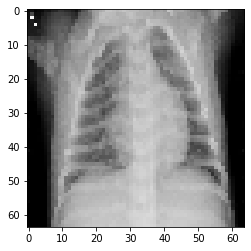

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image_data[279])

In [ ]:
from skimage import color
image = image_data[150]
gray_image = color.rgb2gray(image)

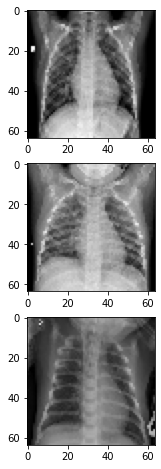

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(8,8))

ax[0].imshow(image)
ax[1].imshow(image_data[151])
ax[2].imshow(image_data[152])

In [ ]:
#may do this later but just trying out the functionality here
gray_data = []
for img in image_data:
   gray_data.append(color.rgb2gray(img))
gray_data = np.array(gray_data) # not necessary but important to have if they want to keep data as numpy array

In [ ]:
def normalize_one_image(image):

  return (image - np.min(image)) / (np.max(image) - np.min(image))

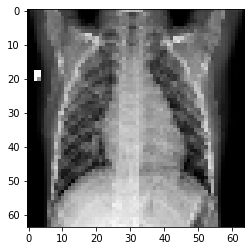

In [ ]:
norm_imgs = []
for im in image_data: # could also use grayscale image set
  norm_imgs.append(normalize_one_image(im))
norm_imgs = np.array(norm_imgs)
plt.imshow(image)

In [ ]:
X = norm_imgs
y = metadata['class'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9)

In [ ]:
X_test.shape

(560, 64, 64, 3)

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

(<matplotlib.axes._subplots.AxesSubplot at 0x7f64c825ec90>,
 <matplotlib.image.AxesImage at 0x7f64c81e3190>)

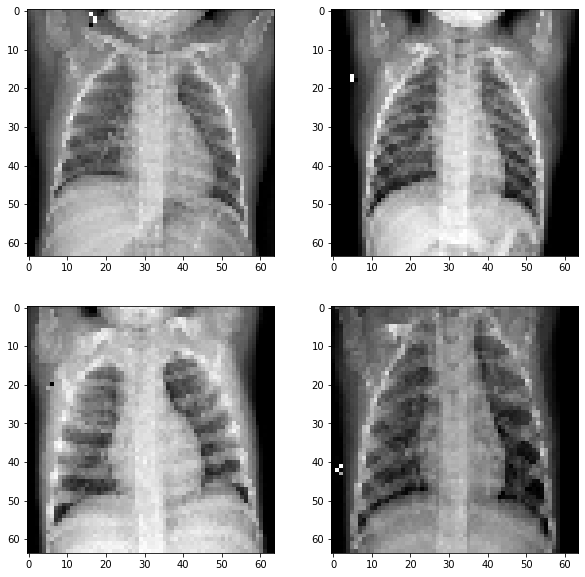

In [ ]:
train_x = X_train
train_y = y_train
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state=9)

In [ ]:
train_y = torch.tensor(train_y, dtype=torch.int)
train_y.shape


torch.Size([2016])

In [ ]:
train_x = train_x.reshape(2016, 3, 64, 64)
train_x = torch.from_numpy(train_x)

train_x.shape, train_y.shape

(torch.Size([2016, 3, 64, 64]), torch.Size([2016]))

In [ ]:
val_x = val_x.reshape(224, 3, 64, 64)
val_x = torch.from_numpy(val_x)

val_y = torch.tensor(val_y, dtype=torch.int)
val_y.shape, val_x.shape

(torch.Size([224]), torch.Size([224, 3, 64, 64]))

In [ ]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 3, kernel_size=3, stride=1, padding=1), # (2016,3,64,64)
            ReLU(inplace=True),
            Conv2d(3, 4, kernel_size=4, stride=2, padding=1), # (2016,4,32,32)
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2), # (2016,4,16,16)
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=2, padding=1), #(2016,4,8,8)
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2), #(2016,4,4,4)
        )

        self.linear_layers = Sequential(
            Linear(4 * 4 * 4, 2)
        )


    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:

model = Net()

optimizer = Adam(model.parameters(), lr=0.07)

criterion = CrossEntropyLoss()

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(3, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(4, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [ ]:
import torch.nn.functional as F

In [ ]:
def check_accuracy(model,x,y):
  with torch.no_grad():
    scores = model(x)
    _,preds = scores.max(1)
    num_correct = (preds == y).sum()
    acc = float(num_correct)/preds.size(0)
    return acc

In [ ]:
def train(model, optimizer, epochs,verbose=True):
    model = model.to(device=torch.device('cuda'))
    train_acc = []
    val_acc = []
    for e in range(epochs):
      if verbose:
        print(e)
      model.train()

      x_train, y_train = Variable(train_x), Variable(train_y)

      x_val, y_val = Variable(val_x), Variable(val_y)
      y_train = y_train.type(torch.LongTensor)
      y_val = y_val.type(torch.LongTensor)

      if torch.cuda.is_available():
          x_train = x_train.cuda()
          y_train = y_train.cuda()
          x_val = x_val.cuda()
          y_val = y_val.cuda()

      scores = model(x_train)
      loss = F.cross_entropy(scores, y_train)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if epochs%2 == 0:
          t_acc = check_accuracy(model,x_train,y_train)
          train_acc.append(t_acc)
          if verbose:
            print("Training accuracy:", t_acc)
          v_acc = check_accuracy(model,x_val,y_val)
          val_acc.append(v_acc)
          if verbose:
            print("Validation accuracy:", v_acc)
    return train_acc, val_acc



In [ ]:
from torchvision import models
#DEBUG
def tune_params(lr_list,verbose=True):
  """lr_list: learning rates you'd like to try"""
  model = models.resnet18(pretrained=True)
  best_acc = 0
  best_lr = None
  best_model = None
  best_train_acc,best_val_acc = None,None
  for lr in lr_list:
    print("Learning rate:", lr)
    optimizer = Adam(model.parameters(), lr=lr)
    train_acc,val_acc = train(model,optimizer,100,verbose=verbose)
    print("Training accuracy:", train_acc[-1])
    print("Validation accuracy:", val_acc[-1])
    if val_acc[-1]>best_acc:
      best_lr = lr
      best_model = model
      best_train_acc,best_val_acc = train_acc,val_acc
    plt.plot(range(len(train_acc)),train_acc,label="training accuracy")
    plt.plot(range(len(val_acc)),val_acc,label="validation accuracy")
    plt.show()
  return lr,best_train_acc,best_val_acc,best_model


In [ ]:
#exponents = -.01*np.random.choice(range(100,400),10)
#lr_list = 10**exponents
lr_list=np.array([0.05888437, 0.03715352, 0.00128825, 0.09120108, 0.00013804,
       0.00316228, 0.0006166 , 0.00047863, 0.08317638, 0.00016982])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Learning rate: 0.05888437
Training accuracy: 0.9469246031746031
Validation accuracy: 0.8928571428571429


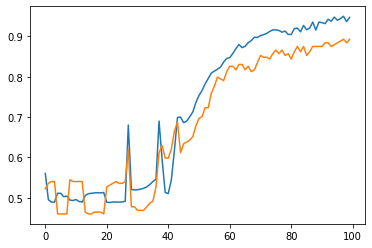

Learning rate: 0.03715352
Training accuracy: 0.9310515873015873
Validation accuracy: 0.8571428571428571


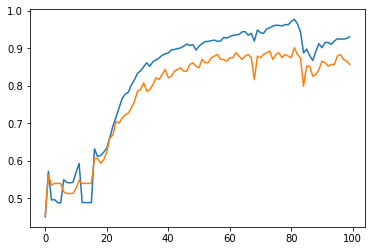

Learning rate: 0.00128825
Training accuracy: 0.9940476190476191
Validation accuracy: 0.8705357142857143


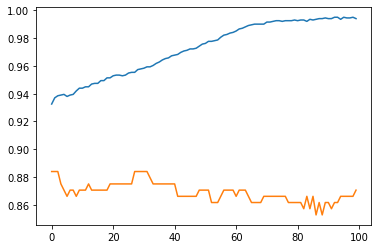

Learning rate: 0.09120108
Training accuracy: 0.9588293650793651
Validation accuracy: 0.8794642857142857


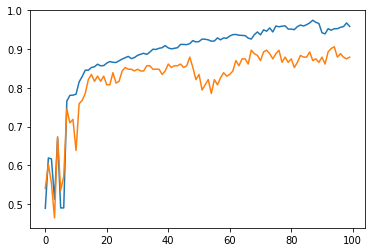

Learning rate: 0.00013804
Training accuracy: 0.9826388888888888
Validation accuracy: 0.8571428571428571


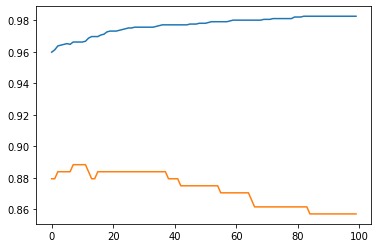

Learning rate: 0.00316228
Training accuracy: 1.0
Validation accuracy: 0.8794642857142857


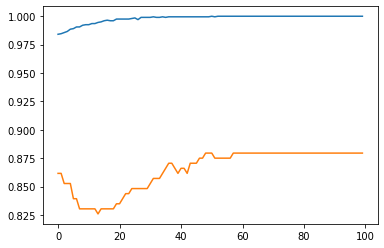

Learning rate: 0.0006166
Training accuracy: 1.0
Validation accuracy: 0.8883928571428571


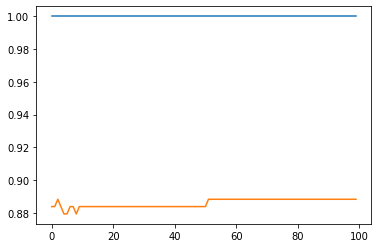

Learning rate: 0.00047863
Training accuracy: 1.0
Validation accuracy: 0.8839285714285714


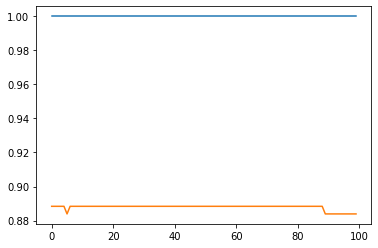

Learning rate: 0.08317638
Training accuracy: 0.9995039682539683
Validation accuracy: 0.8973214285714286


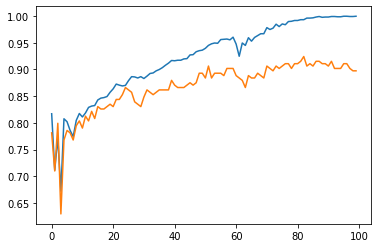

Learning rate: 0.00016982
Training accuracy: 1.0
Validation accuracy: 0.9017857142857143


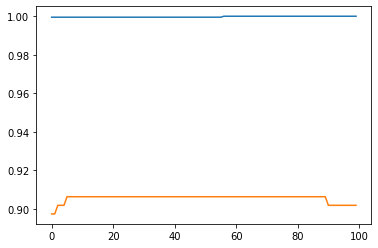

In [ ]:
lr,best_train_acc,best_val_acc,best_model = tune_params(lr_list,verbose=False)

In [ ]:
x_test = X_test.reshape(560, 3, 64, 64)
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(np.array(y_test))
x_test, y_test = Variable(x_test), Variable(y_test)
y_test = y_test.type(torch.LongTensor)

if torch.cuda.is_available():
  x_test = x_test.cuda()
  y_test = y_test.cuda()

In [ ]:
check_accuracy(best_model,x_test,y_test)

0.9285714285714286

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


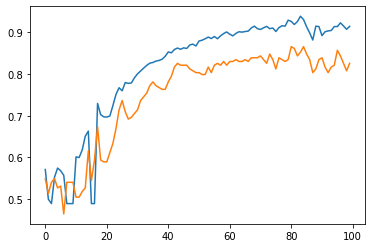

In [ ]:
model = models.resnet18(pretrained=True)
optimizer = Adam(model.parameters(), lr=.07)
train_acc,val_acc = train(model,optimizer,100,verbose=False)
plt.plot(range(len(train_acc)),train_acc,label="training accuracy")
plt.plot(range(len(val_acc)),val_acc,label="validation accuracy")